# NMSM Homework: Monte Carlo 1
#### Marco Zenari

### Data processing

In [19]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.stats import gaussian_kde #for scatter with gaussian kernel density

## Exercise 2.2

Sample random numbers from a given distribution with the inversion method

### 2.2.1
p(x)=c x^n with n=3, x€[0,1]

In [2]:
#Loading the data 
data_file = "data/data_power_sample_1.txt"
data = np.loadtxt(data_file)

In [3]:
#power distribution
x = np.linspace(0,1,100)
n = 3
y = x**n/np.sum(x**n*1/100)

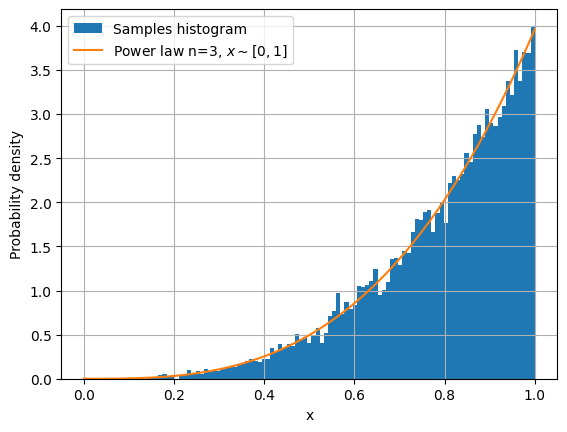

In [4]:
#Histogramming the data and confronting with power distribution
plt.hist(data, density=True, bins=int(np.sqrt(len(data))), label='Samples histogram')
plt.plot(x, y, label=r'Power law n=3, $x\sim[0,1]$')
plt.legend()
plt.xlabel('x')
plt.ylabel('Probability density')
plt.grid()
plt.savefig('plots/power_law_n=3.png')

p(x)=c x^n with n=4, x€[0,1]

In [5]:
#Loading the data 
data_file = "data/data_power_sample_2.txt"
data = np.loadtxt(data_file)

In [6]:
#power distribution
x = np.linspace(0,1,100)
n = 4
y = x**n/np.sum(x**n*1/100)

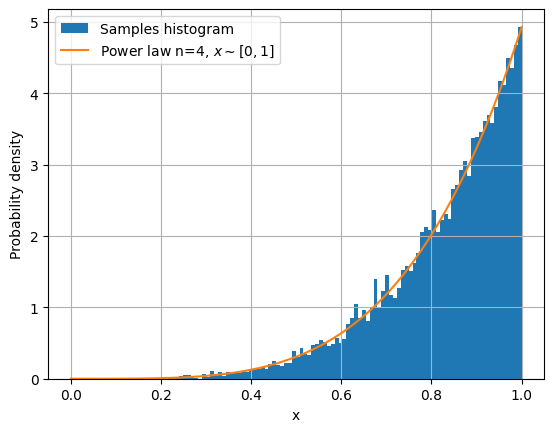

In [7]:
#Histogramming the data and confronting with power distribution
plt.hist(data, density=True, bins=int(np.sqrt(len(data))), label='Samples histogram')
plt.plot(x, y, label='Power law n=4, $x\sim[0,1]$')
plt.legend()
plt.xlabel('x')
plt.ylabel('Probability density')
plt.grid()
plt.savefig('plots/power_law_n=4.png')

p(x)=c x^n with n=2, x€[0,2]

In [8]:
#Loading the data 
data_file = "data/data_power_sample_3.txt"
data = np.loadtxt(data_file)

In [9]:
#power distribution
x = np.linspace(0,2,200)
n = 2
y = x**n/np.sum(x**n*2/200)

In [10]:
#Histogramming the data and confronting with power distribution
plt.hist(data, density=True, bins=int(np.sqrt(len(data))), label='Samples histogram')
plt.plot(x, y, label='Power law n=2, $x\sim[0,2]$')
plt.legend()
plt.xlabel('x')
plt.ylabel('Probability density')
plt.grid()
plt.savefig('plots/power_law_n=2_x=2.png')

## 2.3
Sampling from a unitary radius disk in the wrong way

In [11]:
#Loading the data
data_file = "data/disk_sample_wrong.txt"
data = np.loadtxt(data_file)

In [12]:
# transforming radius and theta in x and y
x = data[:, 0]*np.cos(data[:,1])
y = data[:, 0]*np.sin(data[:,1])
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy) #computing gaussian kernel density

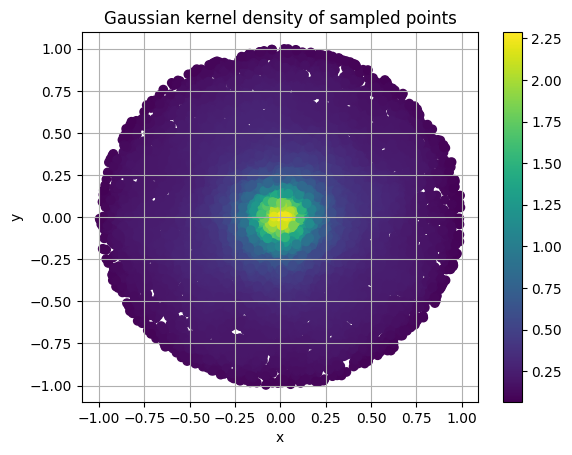

In [13]:
#Gaussian kernel density plot
sc=plt.scatter(x, y, c=z, norm='linear')
plt.colorbar(sc)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gaussian kernel density of sampled points')
plt.grid()
plt.savefig('plots/disk_sample_wrong.png')

Sampling from a unitary radius disk in the correct way

In [14]:
#Loading the data
data_file = "data/disk_sample_right.txt"
data = np.loadtxt(data_file)

In [15]:
# transforming radius and theta in x and y
x = data[:, 0]*np.cos(data[:,1])
y = data[:, 0]*np.sin(data[:,1])
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy) #computing gaussian kernel density

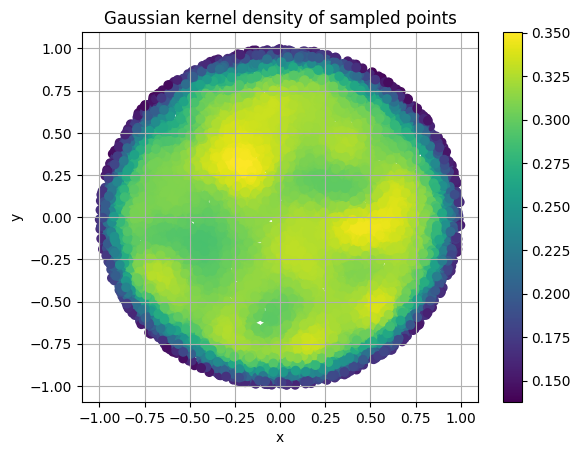

In [16]:
#Gaussian kernel density plot
sc=plt.scatter(x, y, c=z, norm='linear')
plt.colorbar(sc)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gaussian kernel density of sampled points')
plt.grid()
plt.savefig('plots/disk_sample_right.png')

Sampling from a 2 dim gaussian - Box Muller

In [17]:
#Loading the data
data_file = "data/gaussian_sample1.txt"
data = np.loadtxt(data_file)

In [20]:
#Gaussian with mu = 0 and sigma = 1
mu = 0
sigma = 1
x = np.linspace(-4, 4, 800)
y = sc.stats.norm.pdf(x, mu, sigma)

In [21]:
#Plot of x
plt.hist(data[:,0], density = True, bins=int(np.sqrt(len(data))), label='Histogram of samples')
plt.plot(x, y, label='N[0,1]')
plt.legend()
plt.xlabel('x')
plt.ylabel('Probability density')
plt.grid()
plt.savefig('plots/normal_0_1_x.png')

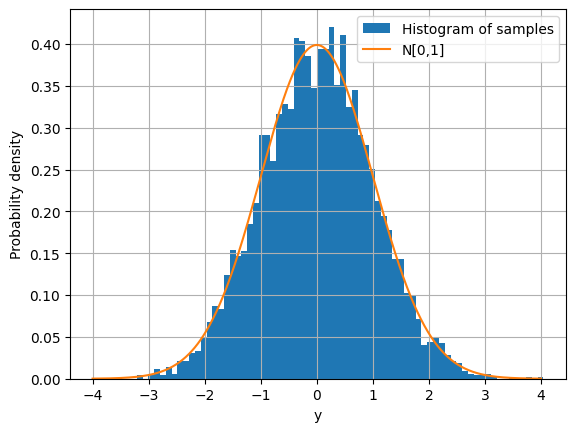

In [22]:
#Plot of y
plt.hist(data[:,1], density = True, bins=int(np.sqrt(len(data))), label='Histogram of samples')
plt.plot(x, y, label='N[0,1]')
plt.legend()
plt.xlabel('y')
plt.ylabel('Probability density')
plt.grid()
plt.savefig('plots/normal_0_1_y.png')

In [23]:
#Loading the data
data_file = "data/gaussian_sample2.txt"
data = np.loadtxt(data_file)

In [24]:
#Gaussian with mu = 3 and sigma = 2
mu = 3
sigma = 2
x = np.linspace(-5, 11, 1600)
y = sc.stats.norm.pdf(x, mu, sigma)

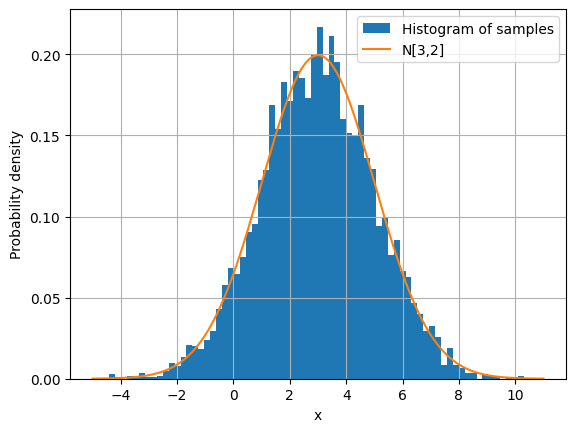

In [25]:
plt.hist(data[:,0], density = True, bins=int(np.sqrt(len(data))), label='Histogram of samples')
plt.plot(x, y, label='N[3,2]')
plt.legend()
plt.xlabel('x')
plt.ylabel('Probability density')
plt.grid()
plt.savefig('plots/normal_3_2_x.png')

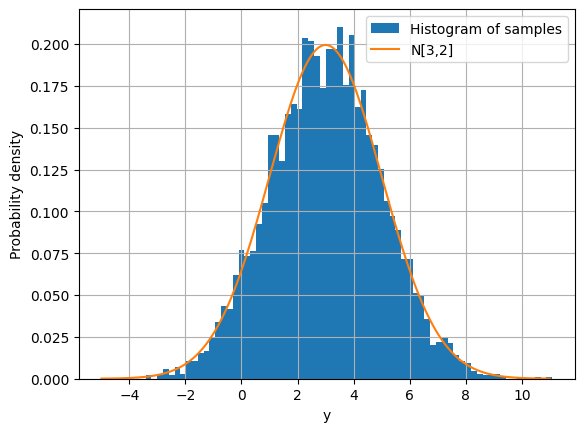

In [26]:
plt.hist(data[:,1], density = True, bins=int(np.sqrt(len(data))), label='Histogram of samples')
plt.plot(x, y, label='N[3,2]')
plt.legend()
plt.xlabel('y')
plt.ylabel('Probability density')
plt.grid()
plt.savefig('plots/normal_3_2_y.png')

## ES 2.3.1

In [27]:
#Loading the data
data_file = "data/data_for_importance_sampling.txt"
data = np.loadtxt(data_file)

In [28]:
#pdf from which the data are sampled
def pdf(x):
    out = 2/np.sqrt(np.pi)*np.exp(-x*x)
    return out

In [29]:
#just for debugging
def g(x, A, p):
    if (x<=p):
        out = A
    else:
        out = A/p*x*np.exp(p*p-x*x)    
    
    return out

In [30]:
x = np.linspace(0,4, 1000)
y= np.zeros(len(x)) 
y = pdf(x)

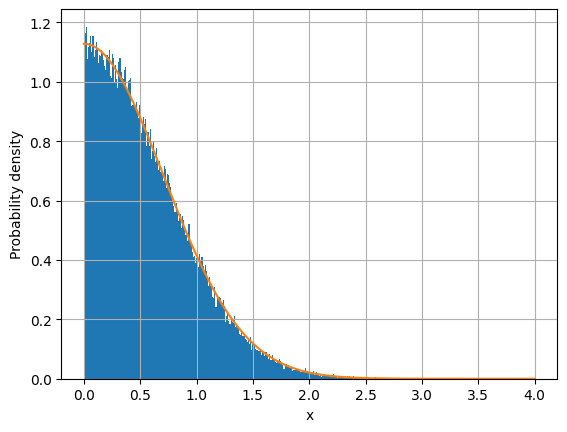

In [31]:
plt.hist(data, density= True, bins = int(np.sqrt(len(data))))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Probability density')
plt.grid()
plt.savefig('plots/half_gaussian_sampling.png')

## ES 2.4 b

In [32]:
def function_g(x):
    return 3/np.pi-12/np.pi**3*x**2

def function_f(x):
    return np.cos(x)

def function_g1(x):
    return 1-(4/np.pi-8/np.pi**2)*x

In [33]:
x = np.linspace(0, np.pi/2, 100)

In [34]:
g = function_g(x)
f = function_f(x)
g1= function_g1(x)
c = 1.5

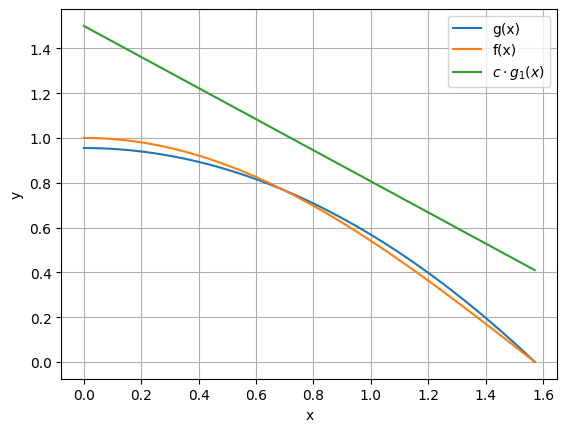

In [35]:
plt.plot(x, g, label = 'g(x)')
plt.plot(x, f, label = 'f(x)')
plt.plot(x, c*g1, label = r'$c\cdot g_1(x)$')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.savefig('plots/es_2_4_b.png')